In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/H-B-P/d-and-d-sci-may/main/dset.csv"
df = pd.read_csv(url)

A solution to https://www.lesswrong.com/posts/afcBzhBmmiL6ba5vm/d-and-d-sci-may-2021-monster-carcass-auction

In [3]:
df.columns = ['Species','Days','CBid','WBid','Revenue']

In [16]:
print(df)

           Species  Days  CBid  WBid  Revenue
0      Winter Wolf     5  25.0  25.0     29.0
1             Yeti     3  62.0  62.0     65.0
2     Snow Serpent     8  19.0  19.0     28.0
3             Yeti     5  53.0  53.0     61.0
4     Snow Serpent     5  15.0  16.0      NaN
...            ...   ...   ...   ...      ...
1672  Snow Serpent     6  13.0  14.0      NaN
1673   Winter Wolf     3  28.0  28.0     41.0
1674          Yeti     6  47.0  47.0     53.0
1675  Snow Serpent     3  24.0  24.0     26.0
1676          Yeti     1  56.0  56.0     72.0

[1677 rows x 5 columns]


In [17]:
df['CBid'] = df['CBid'].str.rstrip("sp").astype(float)
df['WBid'] = df['WBid'].str.rstrip("sp").astype(float)
df['Revenue'] = df['Revenue'].str.rstrip("sp").astype(float)

In [18]:
rev = df.dropna()

In [19]:
print(rev)

           Species  Days  CBid  WBid  Revenue
0      Winter Wolf     5  25.0  25.0     29.0
1             Yeti     3  62.0  62.0     65.0
2     Snow Serpent     8  19.0  19.0     28.0
3             Yeti     5  53.0  53.0     61.0
5     Snow Serpent     9  23.0  23.0     24.0
...            ...   ...   ...   ...      ...
1671   Winter Wolf     5  24.0  24.0     32.0
1673   Winter Wolf     3  28.0  28.0     41.0
1674          Yeti     6  47.0  47.0     53.0
1675  Snow Serpent     3  24.0  24.0     26.0
1676          Yeti     1  56.0  56.0     72.0

[899 rows x 5 columns]


<AxesSubplot:xlabel='Days', ylabel='Revenue'>

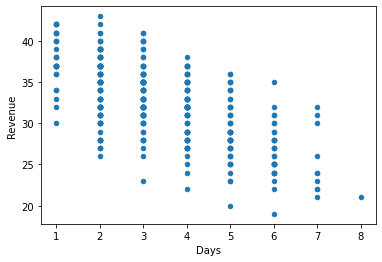

In [21]:
wolfrev = rev[rev.Species == 'Winter Wolf']
wolfrev.plot.scatter(x='Days',y='Revenue')

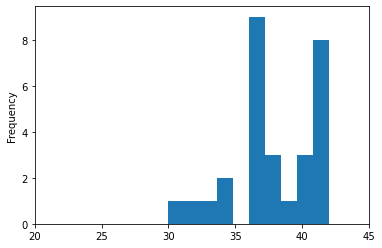

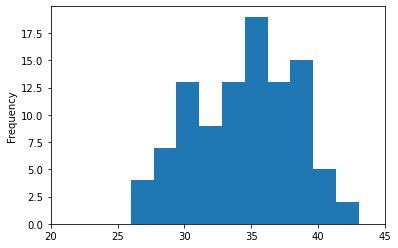

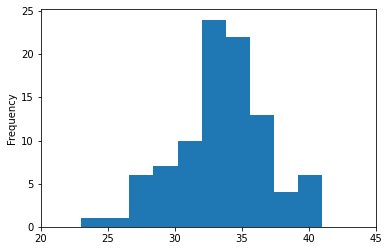

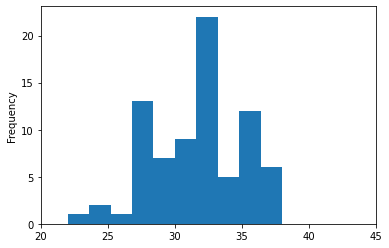

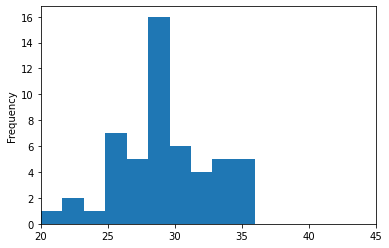

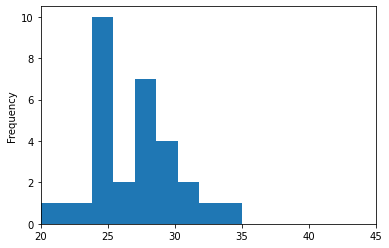

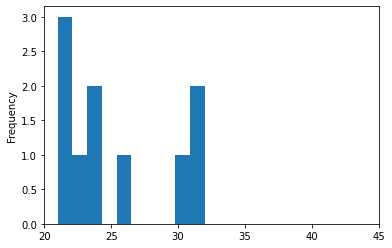

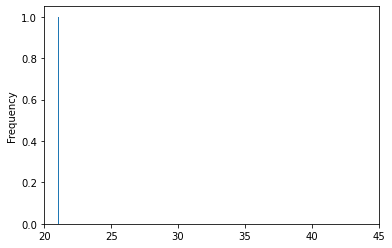

In [40]:
wolfmean = []
for i in range(1,9):
    sub = wolfrev[wolfrev.Days == i]
    wolfmean.append(sub['Revenue'].mean())
    fig = plt.figure()
    plt.xlim([20,45])
    sub['Revenue'].plot.hist()
    

<AxesSubplot:xlabel='Days', ylabel='Revenue'>

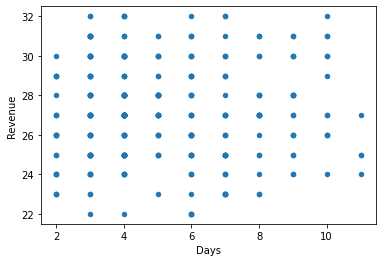

In [41]:
snakerev = rev[rev.Species == 'Snow Serpent']
snakerev.plot.scatter(x='Days',y='Revenue')

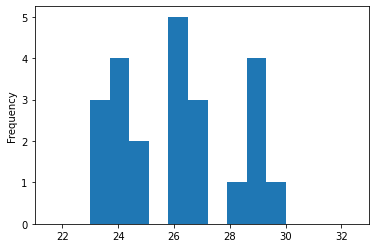

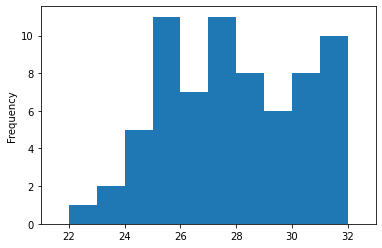

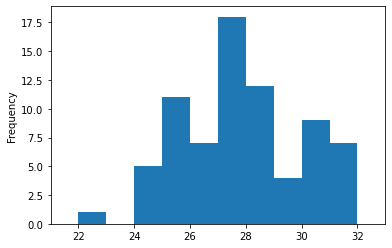

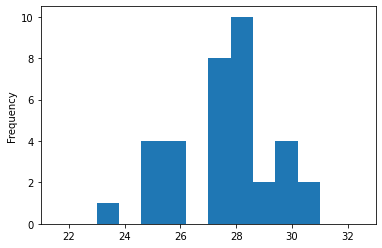

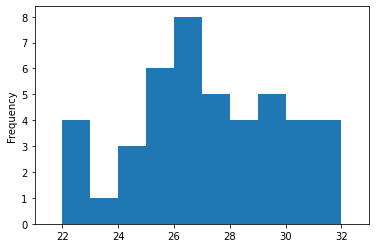

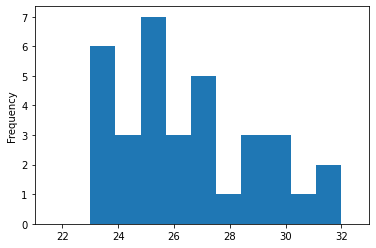

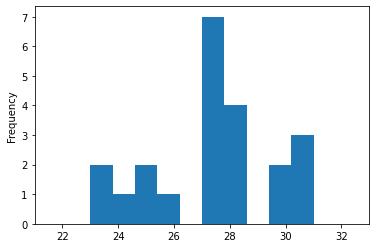

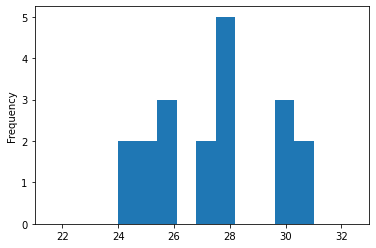

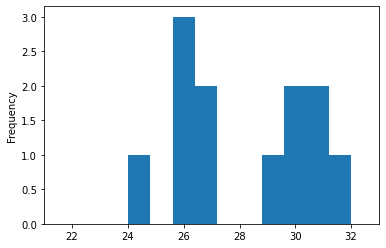

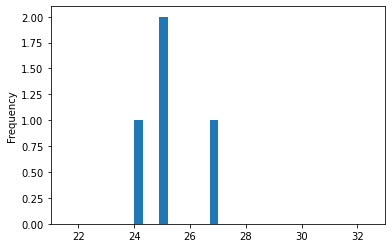

In [45]:
snakemean = []
for i in range(2,12):
    sub = snakerev[snakerev.Days == i]
    snakemean.append(sub['Revenue'].mean())
    fig = plt.figure()
    plt.xlim([21,33])
    sub['Revenue'].plot.hist()

<AxesSubplot:xlabel='Days', ylabel='Revenue'>

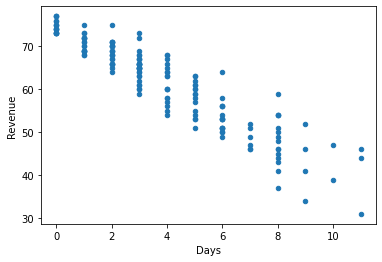

In [46]:
yetirev = rev[rev.Species == 'Yeti']
yetirev.plot.scatter(x='Days',y='Revenue')

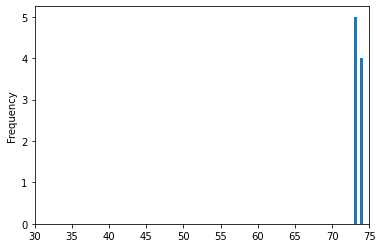

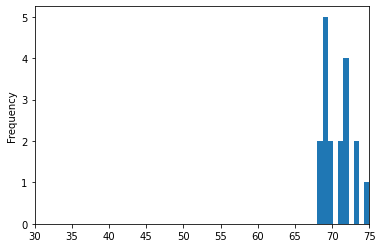

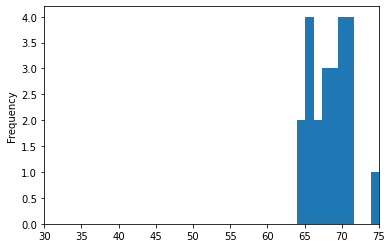

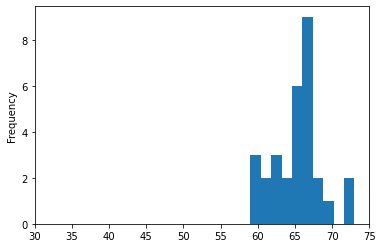

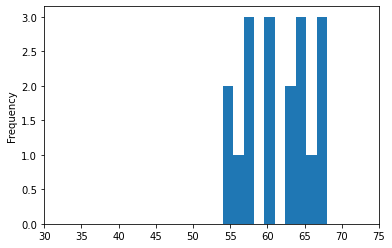

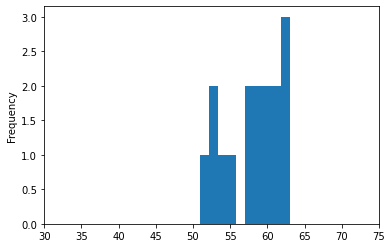

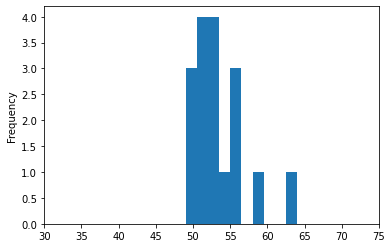

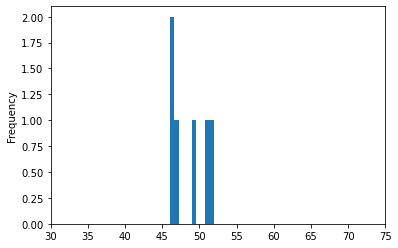

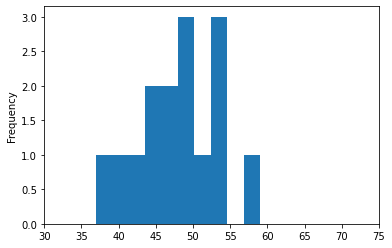

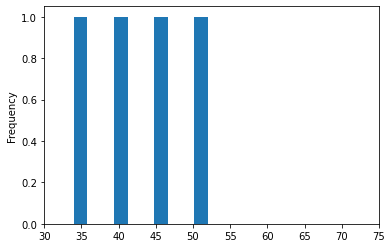

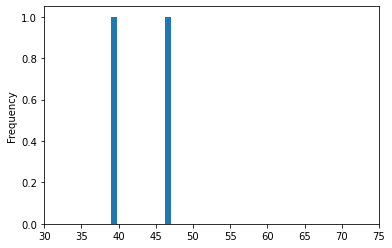

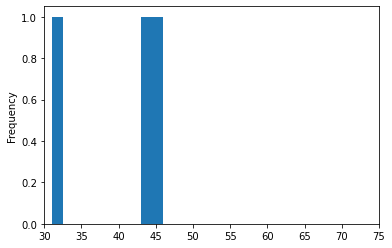

In [47]:
yetimean = []
for i in range(12):
    sub = yetirev[yetirev.Days == i]
    yetimean.append(sub['Revenue'].mean())
    fig = plt.figure()
    plt.xlim([30,75])
    sub['Revenue'].plot.hist()

In [48]:
print(wolfmean)
print(snakemean)
print(yetimean)

[37.89655172413793, 34.43, 33.43617021276596, 31.58974358974359, 29.115384615384617, 26.733333333333334, 25.5, 21.0]
[26.08695652173913, 27.420289855072465, 27.405405405405407, 27.514285714285716, 26.772727272727273, 26.41176470588235, 27.272727272727273, 27.473684210526315, 28.25, 25.25]
[74.6470588235294, 70.66666666666667, 68.56521739130434, 65.13333333333334, 61.44444444444444, 58.0625, 53.470588235294116, 48.5, 48.06666666666667, 43.25, 43.0, 40.333333333333336]


I have now identified estimates for the true average butchering value of the monsters at all days since death.

An initial guess for how to bet at an auction is hence to bet on all lots, with a value equal to p% less than our estimated true value of the monster, where p is a parameter.

I also wish to exploit the other bettors; I will repeat the above analysis, but plot the winning bet instead of butchering value; I hope to find a specific type/age of monster that is consistently underbet by my opponents.

In [50]:
bet = df[df['Revenue'].isnull()]
print(bet)

           Species  Days  CBid  WBid  Revenue
4     Snow Serpent     5  15.0  16.0      NaN
8      Winter Wolf     1  37.0  38.0      NaN
11    Snow Serpent     0  15.0  60.0      NaN
13    Snow Serpent     2  12.0  20.0      NaN
16    Snow Serpent     8  14.0  14.0      NaN
...            ...   ...   ...   ...      ...
1664   Winter Wolf    10   5.0  22.0      NaN
1666          Yeti     2  39.0  43.0      NaN
1667  Snow Serpent     1  18.0  40.0      NaN
1670  Snow Serpent     1  15.0  40.0      NaN
1672  Snow Serpent     6  13.0  14.0      NaN

[778 rows x 5 columns]


<AxesSubplot:xlabel='Days', ylabel='WBid'>

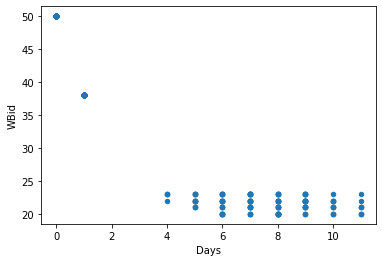

In [51]:
wolfbet = bet[bet.Species == 'Winter Wolf']
wolfbet.plot.scatter(x='Days',y='WBid')

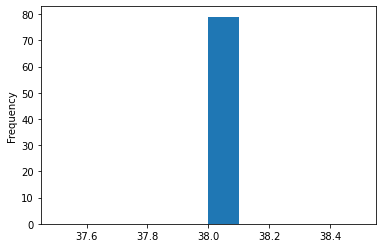

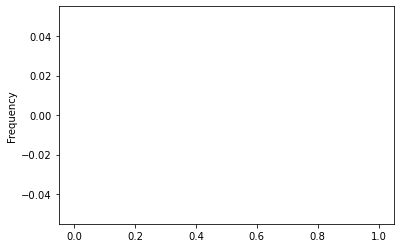

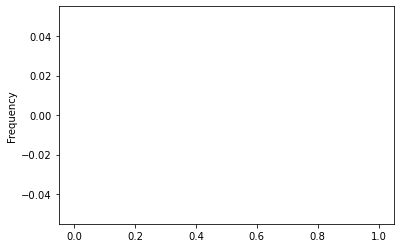

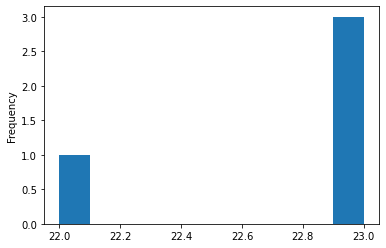

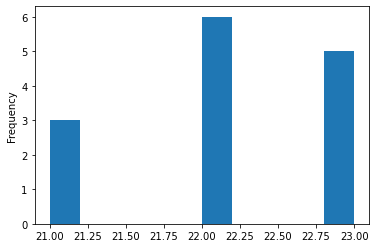

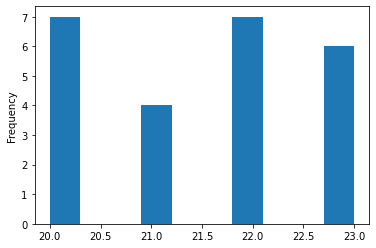

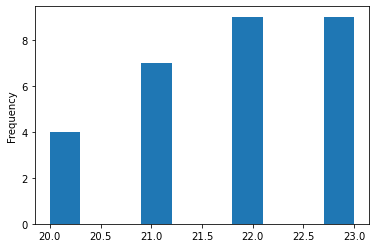

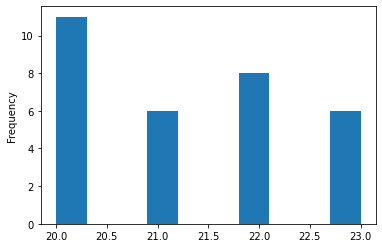

In [52]:
wolfbetmean = []
for i in range(1,9):
    sub = wolfbet[wolfbet.Days == i]
    wolfbetmean.append(sub['WBid'].mean())
    fig = plt.figure()
    #plt.xlim([20,45])
    sub['WBid'].plot.hist()
    

In order to win a 4+ day-old wolf, I need bet 24. This gives an expected profit of 7.5 to 1.5 (based on age).

For 1-3 day-old wolves, I need check what Carver's winning bids have been; the expected revenue is only 33-37, so I need to able to bet less than that.

In [59]:
cwolfbetmean = []
for i in range(4):
    t = rev[(rev.Days == i) & (rev.Species == 'Winter Wolf')]
    cwolfbetmean.append(t['WBid'].mean())

In [60]:
print(cwolfbetmean)

[nan, 40.37931034482759, 33.57, 30.595744680851062]


1-day old wolves are not worth it, 2-day olds might be at 33, but will give minimal profit - only if my total sum of bets would otherwise be <400, and 3-day olds are probably worth it at 30 or 31.

<AxesSubplot:xlabel='Days', ylabel='WBid'>

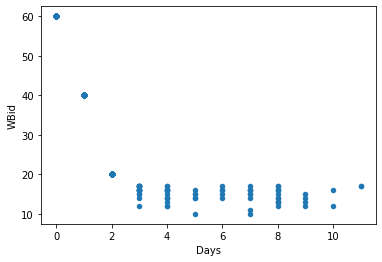

In [53]:
snakebet = bet[bet.Species == 'Snow Serpent']
snakebet.plot.scatter(x='Days',y='WBid')

Again, 'Old' snakes can be bought for 18 gold (or 17 gold if I take a risk of losing). Snakes lose minimal value over time; I buy all 3+ day-old snakes for 18, and 2 day-old snakes for 21. Younger snakes are not worth it.

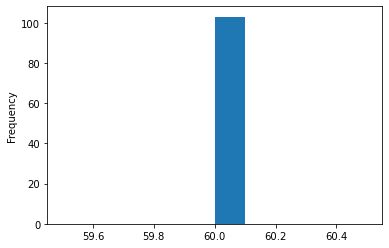

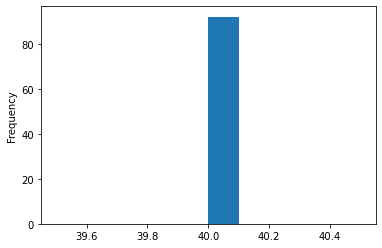

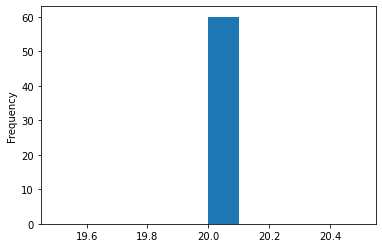

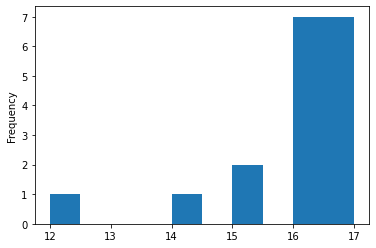

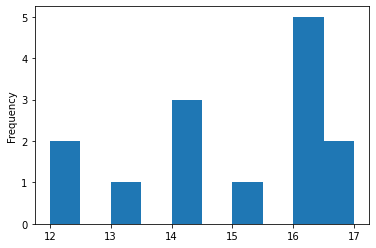

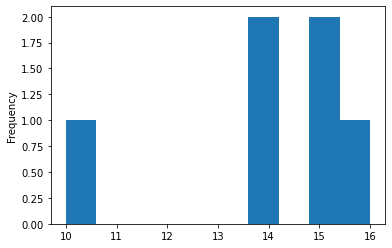

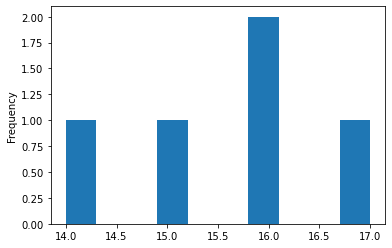

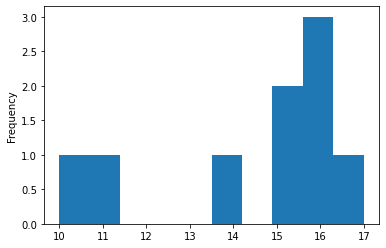

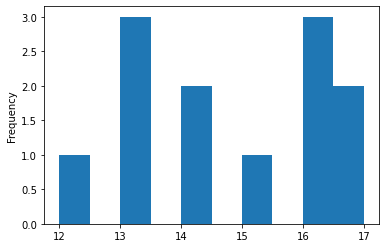

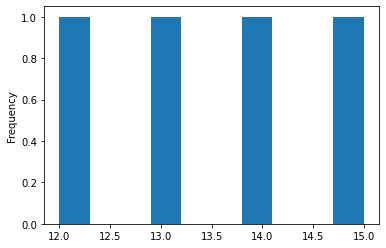

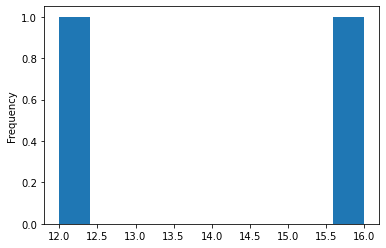

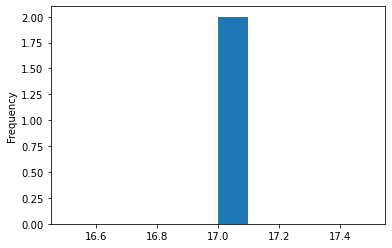

In [61]:
snakebetmean = []
for i in range(0,12):
    sub = snakebet[snakebet.Days == i]
    snakebetmean.append(sub['WBid'].mean())
    fig = plt.figure()
    #plt.xlim([21,33])
    sub['WBid'].plot.hist()

<AxesSubplot:xlabel='Days', ylabel='WBid'>

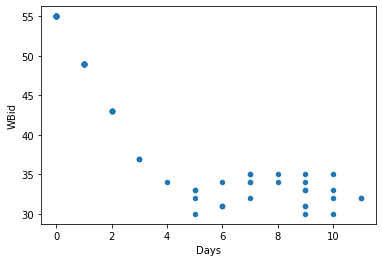

In [55]:
yetibet = bet[bet.Species == 'Yeti']
yetibet.plot.scatter(x='Days',y='WBid')

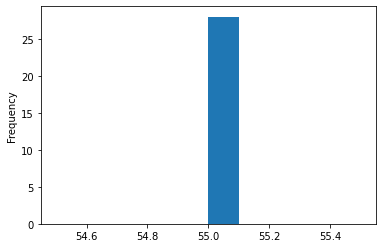

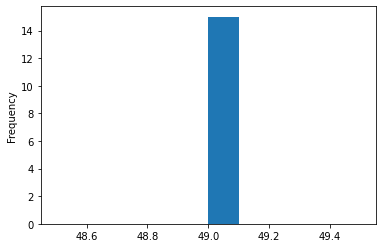

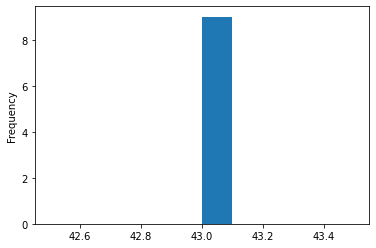

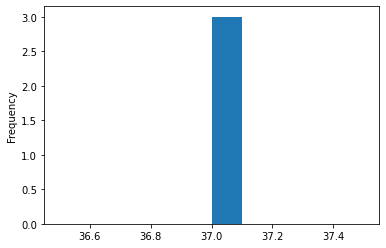

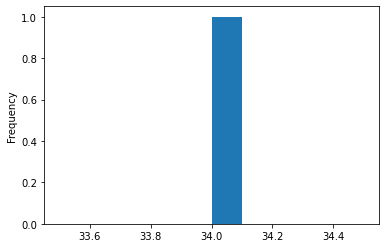

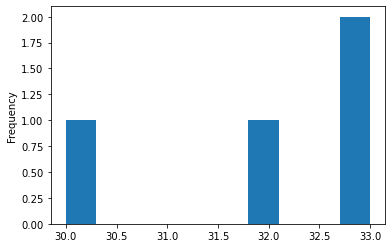

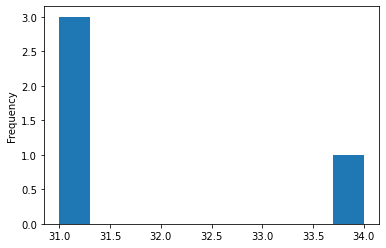

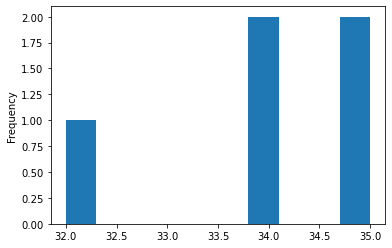

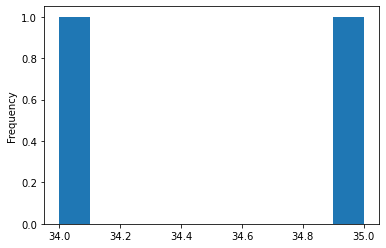

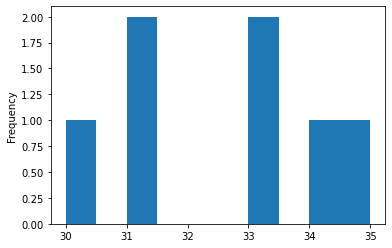

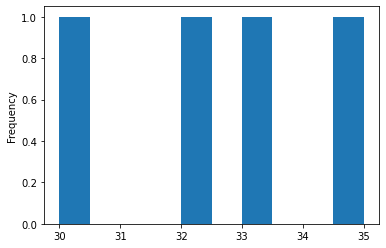

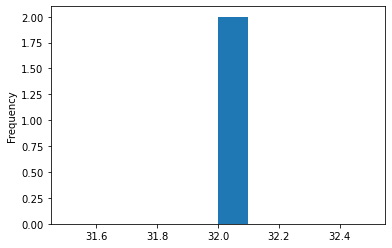

In [56]:
yetibetmean = []
for i in range(12):
    sub = yetibet[yetibet.Days == i]
    yetimean.append(sub['WBid'].mean())
    fig = plt.figure()
    #plt.xlim([30,75])
    sub['WBid'].plot.hist()

Old yetis (4+ days) can be bought for 35-36 gold. All of these are worth it to buy if I can.
Younger yetis are available at 56,50,44,38 gold, and all of these are also worth it.

So, going down the list of things I would like to buy:

Lot 1: 0-day-old Yeti; buy for 56 gold, expect ~18 gold profit.  
Lot 2: 2-day-old Snake; buy for 21 gold, expect ~5 gold profit.  
Lot 3: 1-day-old Snake; do not buy.  
Lot 4: 1-day-old Wolf; do not buy.  
Lot 5: 5-day-old Yeti; buy for 36 gold, expect ~22 gold profit.  
Lot 6: 1-day-old Wolf; do not buy.  
Lot 7: 1-day-old Snake; do not buy.  
Lot 8: 5-day-old Snake; buy for 18 gold, expect ~9 gold profit.  
Lot 9: 3-day-old Wolf;  buy for 30 gold, expect ~3 gold profit.  
Lot 10: 7-day-old Wolf; buy for 24 gold, expect ~2 gold profit.  
Lot 11: 8-day-old Wolf; do not buy.  
Lot 12: 8-day-old Snake; buy for 18 gold, expect ~10 gold profit.  
Lot 13: 2-day-old Wolf; buy for 33 gold, expect ~2 gold profit.  

Total sum of bids; 236 gold, is much less than the 400 I have to spend.

I additionally bid 35 gold each on the 1-day-old wolves, and 18 gold on the 8-day-old Wolf; I do not expect to win the bid, but can get a small profit if I do.